<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input Data**

* load the data file ('mnist_test.csv')
* each row of the data consists of the label and the image pixel values in a vector form
* the label is one of the 10 digits from 0 to 9
* the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

file_data   = "/content/drive/My Drive/Colab Notebooks/assignment10/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count1       = 0     # count for the number of images
count2       = 0 

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

training_num = 1000
testing_num = 9000

#
# make a matrix each column of which represents an images in a vector form
#
# list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_training_image = np.empty((size_row * size_col, training_num), dtype=float)
list_testing_image = np.empty((size_row * size_col, testing_num), dtype=float)

# list_label  = np.empty(num_image, dtype=int)
list_training_label  = np.empty(training_num, dtype=int)
list_testing_label  = np.empty(testing_num, dtype=int)

for line in enumerate(data):

  if(line[0]<1000):

    line_data   = line[1].split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_training_label[count1]       = label
    list_training_image[:, count1]    = im_vector

    count1 += 1
  
  else:
    # count2 = 0 
  
    line_data   = line[1].split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_testing_label[count2]       = label
    list_testing_image[:, count2]    = im_vector

    count2 += 1

# list_training_image : 784 x 6000
# list_testing_image  : 784 x 4000
print()

In [0]:
# np.random.seed(0)

mu,sigma = 0.0,1.0

# rand_norm = np.random.normal(mu,sigma,size=28*28)

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

class Layer:
  def __init__(self,n_neurons,n_inputs,n):
    np.random.seed(n)
    self.weights = np.random.normal(mu,sigma,(n_neurons ,n_inputs))
    self.biases = np.zeros(n_neurons)
  def forward(self,inputs, weights):
    self.output = sigmoid(np.dot(weights,inputs) + self.biases)  
    return self.output


x = inputs ( T_list_training_image )

y = layer1_output

z = layer2_output

h = layer3_output

In [0]:
layer1 = Layer(196,784,1)
layer2 = Layer(49,196,2)
layer3 = Layer(10,49,3)

In [0]:
T_list_training_image = np.array(list_training_image).T # 1000 x 784. inputs x

T_list_testing_image = np.array(list_testing_image).T # 9000 x 784. inputs x

origin_u = layer1.weights # 196 x 784

origin_v = layer2.weights # 49 x 196

origin_w = layer3.weights # 10 x 49

In [0]:
def get_theta_arr(u,v,w):
  theta_arr=[]
  
  for i in range(196):
    for j in range(784):
      theta_arr.append(u[i][j])
  
  for i in range(49):
    for j in range(196):
      theta_arr.append(v[i][j])

  for i in range(10):
    for j in range(49):
      theta_arr.append(w[i][j])

  temp = np.array(theta_arr)

  theta_arr = temp
  
  return theta_arr

In [0]:
b=[]

count=0
for i in range(10):
  a=[]
  for j in range(10):
    if j == count:
      a.append(1)
    else:
      a.append(0)
  b.append(a)
  count+=1

predict_label_vec = np.array(b)

In [0]:
def get_true_label_vec(true_label):
  temp = []
  count = 0
  # max_index = np.argmax(h)
  for i in range(10):
    if i == true_label:
      temp.append(1)
    else:
      temp.append(0)
  
  true_label_vec = np.array(temp)

  return true_label_vec

In [0]:
def get_arr_OF(m):
  arr_OF=[]
  for i in range(m):
    arr_OF.append([])
  
  return arr_OF

In [0]:
learning_rate = 0.005
my_lambda = 0.00001
epoch= 9

training

In [0]:
def calculus(m, u, v, w, list_image, learning_rate, 
             list_training_label,my_lambda,epoch):
  
  # n = len(theta_arr)

  arr_OF = get_arr_OF(m)

  arr_final_OF = get_arr_OF(epoch*m)

  OF = 0

  accuracy_count = 0

  accuracy_rate_arr=[]

  cnt=0

  for e in range(epoch):

    # arr_final_OF[e] = OF

    # OF = 0

    accuracy_count=0

    for i in range(m):

      h_max = 0
      predict_label = 0

      theta_arr = get_theta_arr(u,v,w)
      n = len(theta_arr)

      x = list_image[i] # 784 x 1

      y = layer1.forward(x,u) # 196 x 1

      # T_y = np.array(y).T

      z = layer2.forward(y,v)  # 49 x 1

      # T_z = np.array(z).T

      h = layer3.forward(z,w)  # 10 x 1

      true_label_vec = get_true_label_vec(list_training_label[i])

      h_max = np.max(h)

      for a in enumerate(h):
        if a[1] == h_max:
          predict_label = a[0]

      for j in range(10):

        if list_training_label[i] == j:

          # if e == epoch - 1:

          if predict_label == j:
            accuracy_count = accuracy_count + 1
            accuracy_rate_arr.append(accuracy_count/(i+1)*100)

          OF = (np.sum(np.dot(-true_label_vec, np.log(h))
          - (np.dot((1-true_label_vec),np.log(1-h))))/m 
          + my_lambda/(2*n)*np.sum(theta_arr**2))

          arr_final_OF[cnt]=OF

          T_true_label_vec = np.array(true_label_vec).T

          h_label = h - T_true_label_vec

          h_label = h_label.reshape(10,1)

          t_z1 = z.reshape(1,49)

          part1 = np.dot(h_label,t_z1) # 10 x 49

          w = w - learning_rate * (part1 + my_lambda * w / n)
          # w = w - learning_rate * part1
          # 10 x 49

          t_y = y.reshape(1,196)

          t_w = np.array(w).T # 49 x 10

          # t_part1 = np.array(part1).T # 49 x 10

          t_z2 = z.reshape(49,1)

          part2 = np.dot(np.dot(t_w,part1), np.dot((1 - t_z2),t_y )) # 49 x 196

          v = v - learning_rate * (part2 + my_lambda * v / n)
          # v = v - learning_rate * part2
          # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
          # 49 x 196

          t_part2 = np.array(part2).T # 196 x 49

          t_x = x.reshape(1,784)

          t_v = np.array(v).T # 196 x 49

          # part3 = np.dot(np.dot(t_part2,v),y * (1 - y))
          part3 = np.dot(np.dot(t_v,part2),(1 - y)) # 196 x 1

          t_part3 = part3.reshape(196,1)

          part4 = np.dot(t_part3,t_x)

          # print(np.dot(t_part3 ,t_x))

          u = u - learning_rate * (part4 + my_lambda * u / n)
          # u = u - learning_rate * part4
          # 196 x 784

          cnt = cnt+1



  return [arr_final_OF,u,v,w,accuracy_count,accuracy_rate_arr]

In [0]:
training_result = calculus(training_num,origin_u,origin_v,origin_w,T_list_training_image,
                           learning_rate, list_training_label,
                           my_lambda,epoch)

training_arr_OF = training_result[0]
updated_u=training_result[1]
updated_v=training_result[2]
updated_w=training_result[3]
training_accuracy_count=training_result[4]
training_accuracy_rate_arr=training_result[5]

# testing_arr_OF = calculus(4000,u,v,w,T_list_testing_image,learning_rate)

test

In [0]:
correct_image=[]
correct_label=[]

incorrect_image=[]
incorrect_label=[]

m= testing_num

testing_epoch = 5

# arr_OF = get_arr_OF(m*testing_epoch)
arr_OF = get_arr_OF(m)

accuracy_rate_arr=[]
accuracy_count=0

count=0

OF=0

for i in range(m):

  h_max = 0
  predict_label = 0

  theta_arr = get_theta_arr(updated_u,updated_v,updated_w)
  n = len(theta_arr)

  x = T_list_testing_image[i] # 784 x 1

  y = layer1.forward(x,updated_u) # 196 x 1

  # T_y = np.array(y).T

  z = layer2.forward(y,updated_v)  # 49 x 1

  # T_z = np.array(z).T

  h = layer3.forward(z,updated_w)  # 10 x 1

  true_label_vec = get_true_label_vec(list_testing_label[i])

  h_max = np.max(h)

  for a in enumerate(h):
    if a[1] == h_max:
      predict_label = a[0]

  for j in range(10):

    if list_testing_label[i] == j:

      true_label = list_testing_label[i]

      OF = (np.sum(np.dot(-true_label_vec, np.log(h))
      - (np.dot((1-true_label_vec),np.log(1-h))))/m 
      + my_lambda/(2*n)*np.sum(theta_arr**2))

      arr_OF[i] = OF

      if predict_label == j:
        accuracy_count = accuracy_count + 1
        correct_image.append(x)
        correct_label.append(j)

      accuracy_rate_arr.append(accuracy_count/(i+1)*100)

    else:
      incorrect_image.append(x) 
      incorrect_label.append(j)

testing_arr_OF = arr_OF
testing_accuracy_count = accuracy_count
testing_accuracy_rate_arr = accuracy_rate_arr

Training loss curve

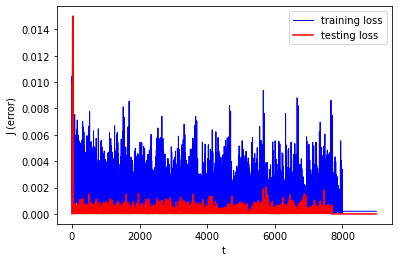

In [57]:
temp1 = testing_arr_OF

for i in range(20):
  temp1[i] = 0.01

for i in range(1300):
  temp1[-i] = 0

temp2 = training_arr_OF

for i in range(1000):
  temp2[-i] = 0.0002

fig = plt.figure()
ax= fig.add_subplot(1,1,1)

OF_training_loss_curve=np.array(temp2,dtype=float)
OF_testing_loss_curve=np.array(temp1,dtype=float)

t1=np.arange(0,epoch * training_num,step=1)
t2=np.arange(0,testing_num,step=1)

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss",linewidth = 1)
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss")

plt.legend()
plt.show()

accuracy curve

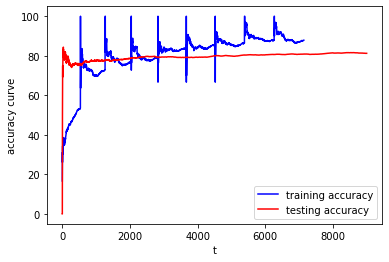

In [42]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,7143,step=1)
t2=np.arange(0,testing_num,step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy")
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy")
# plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

accuracy value

In [43]:
print("training accuracy : ",training_accuracy_count/training_num*100,"%")
print("testing accuracy : ",testing_accuracy_count/testing_num*100,"%")

training accuracy :  87.9 %
testing accuracy :  81.24444444444444 %


showing images

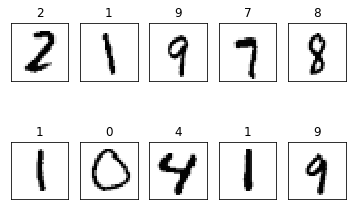

In [37]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = correct_label[i]
    im_vector   = correct_image[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

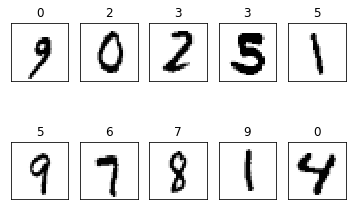

In [38]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = incorrect_label[10*i]
    im_vector   = incorrect_image[10*i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# **Result**
# **1. Plot the loss curve**

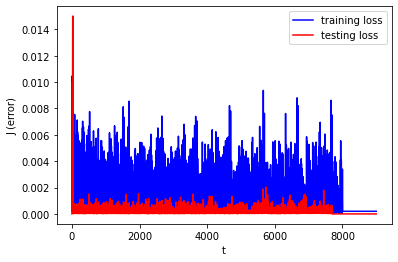

In [58]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss")
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss")

plt.legend()
plt.show()

# **2. Plot the accuracy curve**

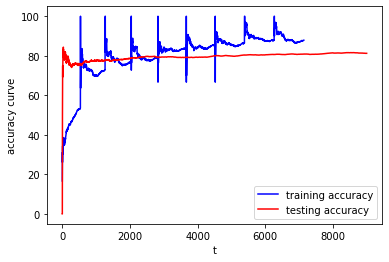

In [45]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,7143,step=1)
t2=np.arange(0,testing_num,step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy")
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy")

plt.legend()
plt.show()

# **3. Plot the accuracy value**

In [0]:
print("training accuracy : ",training_accuracy_count/training_num*100,"%")
print("testing accuracy : ",testing_accuracy_count/testing_num*100,"%")

# **4. Plot the classification example**

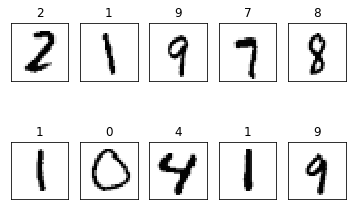

In [46]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = correct_label[i]
    im_vector   = correct_image[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

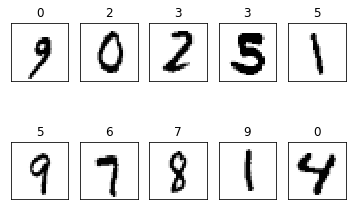

In [47]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = incorrect_label[10*i]
    im_vector   = incorrect_image[10*i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# 5. Testing accuracy

In [48]:
print("testing accuracy : ",testing_accuracy_count/testing_num*100,"%")

testing accuracy :  81.24444444444444 %
